# Testowanie osiągów modelu na zbiorze testowym


In [1]:
%pip install torchvision
import torch
from model import CNN, load_model  # Twój model
from dataloader import load_data  # Ładowanie danych
from training import back_pass, test  # Funkcje treningu i testowania
from visualization import plot_mse, plot_classification_error, plot_all_weights  # Wizualizacje
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

You should consider upgrading via the 'c:\users\kfedo\pycharmprojects\pythonproject\venv\scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


## Ładowanie modelu

In [2]:
# Wybór urządzenia (GPU lub CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Wczytanie modelu
model = CNN().to(device)
model = load_model(model, path="best_model.pth", device=device)
model.eval()


Using device: cpu
Model załadowano z best_model.pth


C:\Users\kfedo\Documents\studia\5 semestr\sieci_neuronowe2\model.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path, map_location=dev

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batch_norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=Tru

In [3]:
# Transformacja danych
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

# Zbiór testowy
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)


In [4]:
# Klasy CIFAR-10
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Listy na poprawne i błędne klasyfikacje
correct_images = []
correct_labels = []
incorrect_images = []
incorrect_labels = []
incorrect_preds = []

# Przejście przez dane testowe
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    
    # Porównanie predykcji z rzeczywistą etykietą
    if predicted == labels:
        correct_images.append(images[0].cpu())
        correct_labels.append(labels[0].item())
    else:
        incorrect_images.append(images[0].cpu())
        incorrect_labels.append(labels[0].item())
        incorrect_preds.append(predicted[0].item())
    
    # Wystarczą np. po 5 przykładów
    if len(correct_images) >= 10 and len(incorrect_images) >= 10:
        break


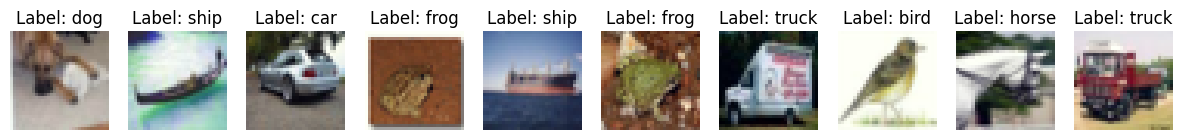

In [5]:
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, ax in enumerate(axes):
    image = correct_images[i].permute(1, 2, 0).numpy()  # Zmień kolejność wymiarów
    image = np.clip(image * 0.2470 + np.array([0.4914, 0.4822, 0.4465]), 0, 1)  # Denormalizacja
    ax.imshow(image)
    ax.set_title(f"Label: {classes[correct_labels[i]]}")
    ax.axis('off')
plt.show()


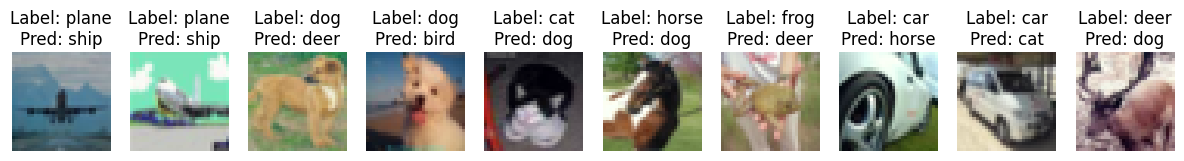

In [6]:
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, ax in enumerate(axes):
    image = incorrect_images[i].permute(1, 2, 0).numpy()  # Zmień kolejność wymiarów
    image = np.clip(image * 0.2470 + np.array([0.4914, 0.4822, 0.4465]), 0, 1)  # Denormalizacja
    ax.imshow(image)
    ax.set_title(f"Label: {classes[incorrect_labels[i]]}\nPred: {classes[incorrect_preds[i]]}")
    ax.axis('off')
plt.show()


In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


In [8]:
y_true = []  # Lista rzeczywistych etykiet
y_pred = []  # Lista przewidywanych etykiet

for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)  # Predykcja klasy
    
    y_true.append(labels.item())
    y_pred.append(predicted.item())

# Zamień listy na NumPy arrays (wymagane przez scikit-learn)
y_true = np.array(y_true)
y_pred = np.array(y_pred)


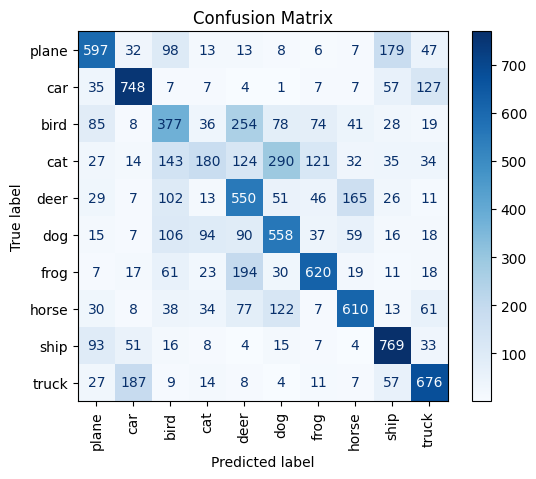

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obliczanie macierzy pomyłek
cm = confusion_matrix(y_true, y_pred)

# Klasy w zbiorze CIFAR-10
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Wyświetlenie macierzy pomyłek
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()
